## Decision Trees and Random Forests 


Decision Tree is a widely-used supervised learning algorithm which is suitable for both classification and regression tasks. Decision Trees serve as building blocks for some prominent ensemble learning algorithms such as Random Forests and XGBoost. A decision tree builds upon iteratively asking questions to partition data. 

<img src="./decisiontree_and_randomforest.png"  width=50% />


### Import the libraries 

Before we import the data, let's load the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree # for decision tree models
from sklearn.ensemble import RandomForestClassifier # for Random Forest (ensemble) method

%matplotlib inline

warnings.filterwarnings("ignore") 

### Data 

In this notebook, we will look into the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). <br/>(Note: the dataset is provided in your Lab folder). 

1. The dataset is about the patients who were detected with 2 kinds of breast cancer : Malignant or Benign
2. The features given here are the characteristics of the cell nuclei computed from the fine needle aspirate (FNA) of a breast mass.
3. Ten real-valued features are computed for each cell nucleus as follows:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

#### Importing the data 

As with the previous Labs, we will start by loading the provided dataset "breast_cancer.csv" into a `DataFrame` named **"input_data"** using once more the function  `pd.read_csv()` (Check the pandas [read_csv() documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if needed). 
- To get acquainted with our data, let’s look at the first 5 entries using `head()`
- Check and print the dimensionality of the data using `shape`
- The dataset is provided in your Lab folder (no need to download it). 

In [2]:
# Read the data from the breast_cancer.csv file (provided in the Lab folder) 
# using the pd.read_csv() function from pandas into a variable named "input_data" 
# Print the dimensionality (shape) of the input_data DataFrame
# Show the first 5 rows of input_data using the function head()

input_data = pd.read_csv("./breast_cancer.csv")
print(input_data.shape)
input_data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Question: can you spot which is the target variable we are trying to predict? 

 Quite often in our analyses, we are provided with columns such identifiers (IDs), which do not contribute any or much information towards the overall analysis. We should therefore learn how to handle them. We can either set them as an index (should we think this may be of use at some point later on) or drop them. 

In [3]:
# The column 'id' contains an Identification number and does not contribute to the analysis
# We can EITHER (1) use the function set_index() to set the 'id' as a row index 
# OR use (2) drop() to remove the 'id' column (remember to set the axis argument). 
# In both cases, you could use inplace=True. If inplace=True, no assignment needs to happen. 
# Alternatively, if we do not use inplace=True, we need to assign back to "input_data". 
# Check the results once more using head() 

input_data.set_index('id', inplace=True)
input_data.head()

# Dropping the unwanted variable:
# input_data.drop('id', axis=1, inplace=True)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



### Split the data into input variable X and class vector y

Decision Trees and Random Forests follow a similar workflow to other supervised models in `sklearn`. We need to first start by setting the `X` matrix (input feature matrix) and `y` vector (class target):

In [4]:
# Common step across all Supervised Machine Learning models in Python

class_var = 'diagnosis'

# Assign the feature data into a new variable named "X"  
# Extract all columns **except** from the label column using either indexing (.loc / .iloc) 
# or input_data.drop() with axis=1

X = input_data.drop(class_var, axis=1)

# Assign the target data (label/class column) into a new variable named "y"
# Extract only the label (class) column

y = input_data[class_var]

In [5]:
# Print the dimensions (shape) for both X and y 
print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (569, 30)
y dimensions:  (569,)


### Investigate the class frequencies

An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.


In [5]:
# Use the function value_counts() on the y variable 
# in order to check the distribution of the binary class 

y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

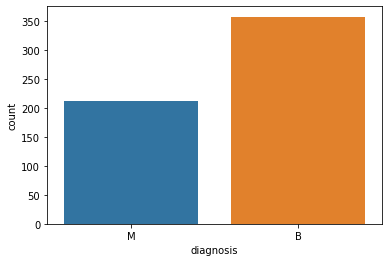

In [7]:
# Try to plot in a barplot using the sns.countplot() with 'data=input_data' and 
# 'x' equal to the feature that contains the target variable 

sns.countplot(x=class_var, data=input_data)
plt.show();

### Mapping (encoding) the categorical variable

In order for the class variable to be in machine-readable form and ready to be used by ML models, it needs to be encoded in a numerical format. `LabelEncoder` from `sklearn` can be used to encode target labels with value between `0` and `n_classes-1`. 

**This transformer should be used to encode target values, i.e. y, and not the input X** (in which case, we can use One Hot Encoding or other ways of encoding). Read more about [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [Transforming the prediction variable(y)](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [8]:
# Convert the categorical values into numbers using the LabelEncoder from sklearn

# Instantiate a LabelEncoder() object and save it to a new variable "le"
le = LabelEncoder()

# Fit the label encoder "le" using fit_transform() on y (pass it as a parameter) 
# Assign back to "y". The fit_transform() function takes a categorical column 
# and converts/maps it to numerical values.
y = le.fit_transform(y)

In [9]:
# Check once more the distribution of the binary class 

pd.DataFrame(y).value_counts()

0    357
1    212
dtype: int64

## Supervised Learning - Classification

For every classification model built with scikit-learn, we will follow four main steps:

1. Building the classification model (using either default, pre-defined or optimized parameters)
2. Training (*fitting*) the model
3. Testing (*predicting*) the model
4. Performance evaluation using various metrics.

### Train-Test Split

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split our dataset into two disjoint sets: train and test (Holdout method).

Use `sklearn`’s `train_test_split()` function to randomly split the data into train and test sets (visit the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the  [model cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)). 

In [10]:
# Use the train_test_split() function from sklearn and pass the following arguments: 
# (1) the X matrix (2) the y vector (3) test_size=0.30 
# (4) stratify=y (5) random_state=0 (for reproducibility)
# Assign the results into the new variables X_train, X_test, y_train, y_test (simultaneously)
# Note: when working with imbalances, it is important to stratify y when doing a train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    stratify=y, random_state=0)

# Print the dimensionality (shape) of X_train, X_test, y_train, y_test 

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (398, 30) (398,)
Shape of x_test and y_test:  (171, 30) (171,)


**Note: it’s good practice to split the train and test sets before doing any feature engineering and/or scaling to avoid data leakage.**


### Scaling 

Decision Trees and Random Forests need little to no data pre-processing so we can skip the step of Scaling / Normalization for today's Lab, mainly to highlight the feature splits in the following `plot_tree` visualization.


### Decision Tree Classifier 

Decision Tree classifiers construct classification models in the form of a tree structure. A decision tree progressively splits the training set into smaller subsets. Each node of the tree represents a subset of the data. Once a new sample is presented to the data, it is classified according to the test condition generated for each node of the tree.

<!-- #### Decision Tree Classifier parameters
- `criterion`: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- `max_features`: The number of features to consider when looking for the best split.
- `max_leaf_nodes`: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. -->

#### Decision Tree Classifier with pre-defined parameters

Let’s start with a decision tree classifier using `max_depth=3`. Do not forget to also set `random_state=0`:

In [11]:
# Step 1 - Instantiate the DecisionTreeClassifier() classifier using the pre-defined parameter "max_depth=3"
# Also use "random_state=0" for reproducibility. Assign the result into a new variable named "dt"

dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Step 2 - Fit the DT model to the training set (use dt.fit())
# Pass as arguments X_train and y_train 
# No need to assign it into a new variable when calling fit()
dt.fit(X_train, y_train)

# Step 3 - Predict the test data using the dt model (use dt.predict())
# Pass as argument only X_test (not y_test!)
# Save the prediction output into a new variable "y_pred"

y_pred = dt.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9181286549707602


In [12]:
# Print the confusion_matrix for the test set using metrics.confusion_matrix()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.confusion_matrix(y_test, y_pred))

[[99  8]
 [ 6 58]]


In [13]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.88      0.91      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



#### Visualization of a tree

We can plot our model using `plot_tree()` function ([`sklearn.tree.plot_tree()` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)).

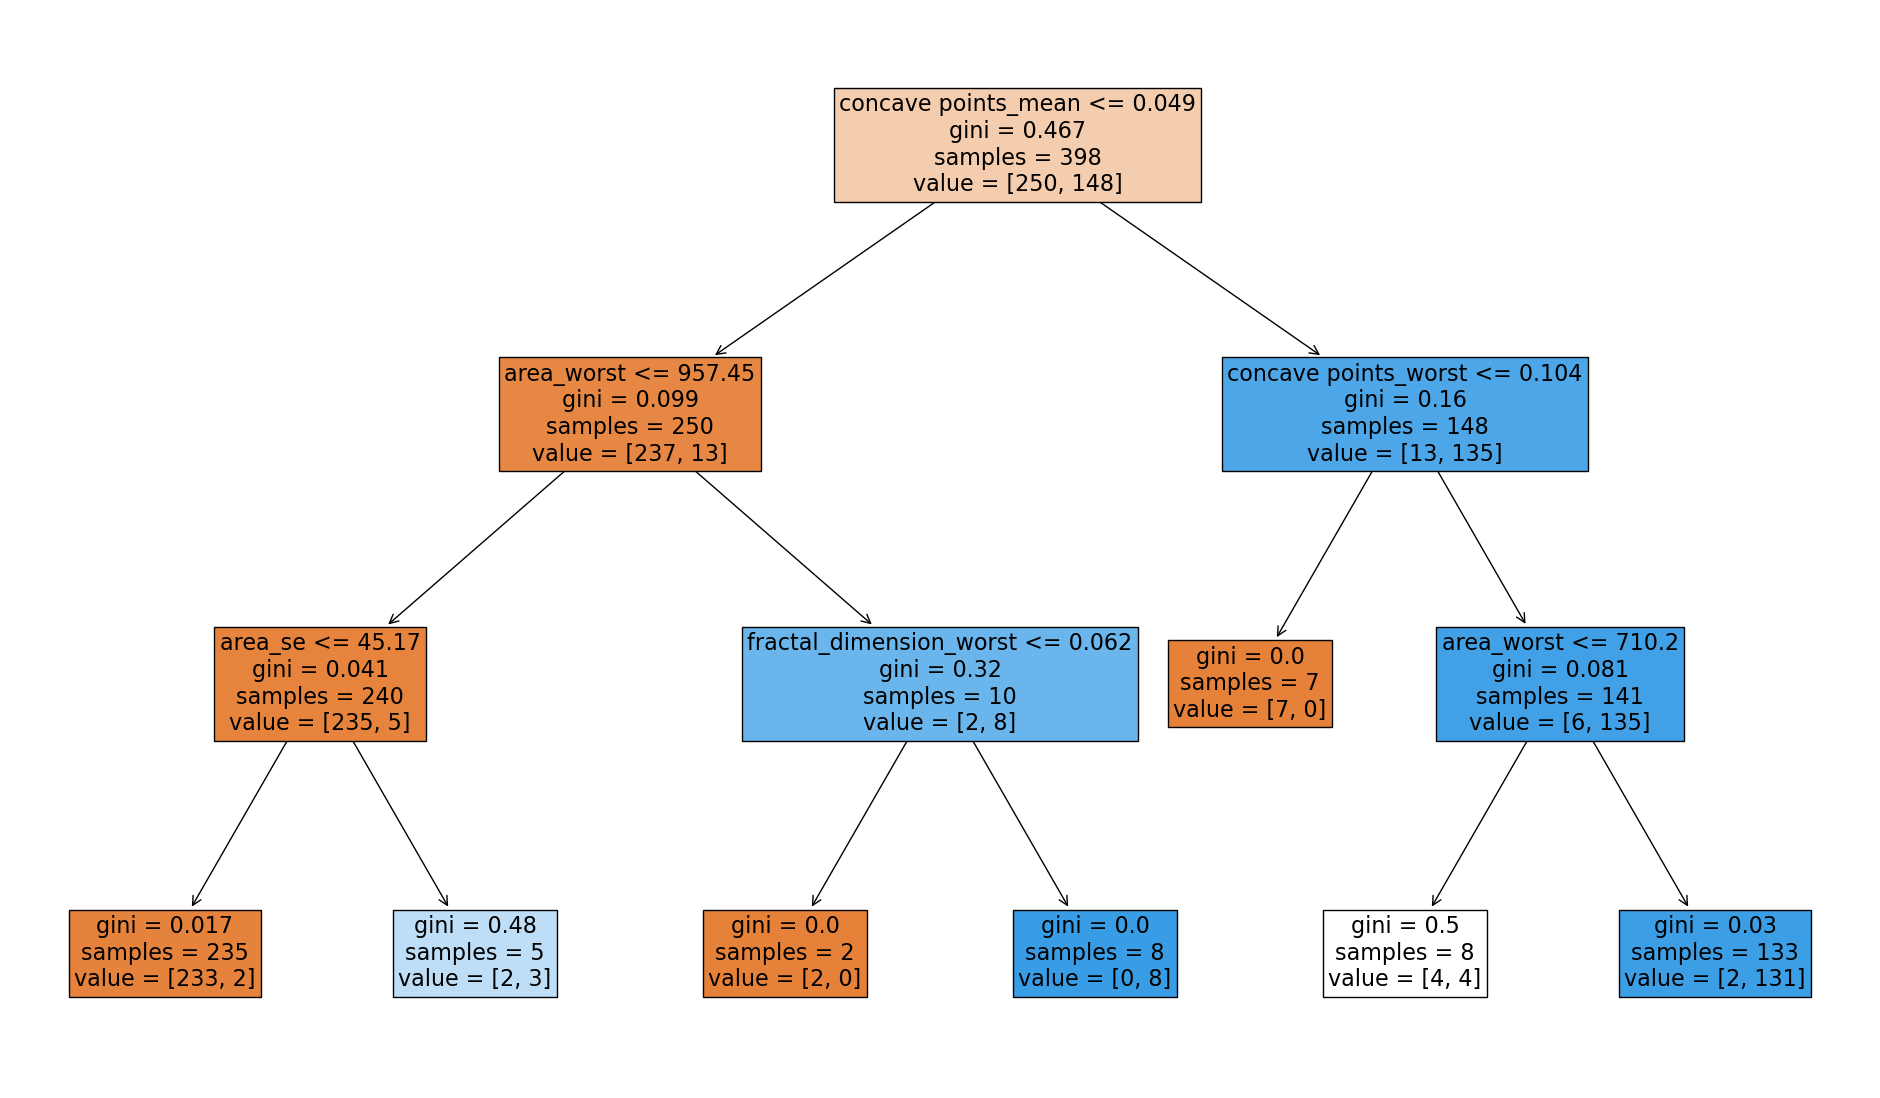

In [14]:
plt.figure(figsize=(24,14))
plot_tree(dt, feature_names=X_train.columns, filled=True, fontsize=16)
plt.show();

The model keeps splitting the nodes until all the nodes are pure (i.e. contain samples from only one class) or when a threshold such as when `max_depth` is reached. 

- In each box, the first line indicates the name of the feature (i.e. column). If we do not name the columns using `feature_names`, the index of the column is shown. Samples indicates the number of observations (i.e. rows) and the value shows the distribution of these samples according to the target variable. 

- Gini is a measure of impurity. The other function to evaluate the quality of a split is entropy which is a measure of uncertainty or randomness. The more randomness a variable has, the higher the entropy is. We can select gini or impurity using the `criterion` parameter. The default value is gini.

- When the algorithm performs a split, the main goal is to decrease impurity as much as possible. The more the impurity decreases, the more informative power that split gains. As the tree gets deeper, the amount of impurity decrease becomes lower. We can use this to prevent the tree from doing further splits. The hyperparameter for this task is `min_impurity_decrease`. It is set to zero by default.

- Another hyperparameter to control the depth of a tree is `max_depth`. It does not make any calculations regarding impurity or sample ratio. The model stops splitting when `max_depth` is reached.

### Random Forest Classifier

Random Forest is one of the most popular and most powerful machine learning algorithms. Random forest is a supervised learning algorithm that is used for classification and regression tasks. The "forest" is an **ensemble of decision trees** (each of which is based on a random subset of the data). The general idea of the bagging method is that a combination of learning models reduces the chance of overfitting. 

#### Random Forest Classifier with pre-defined parameters

In [15]:
# Step 1 - Instantiate the RandomForestClassifier() classifier using some pre-defined parameters
# Set the number of trees to 100 in the RF using 'n_estimators=100'. Also set 'random_state=0' for reproducibility. 
# Assign the result into a new variable named "rf"

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Step 2 - Fit the rf model to the training set (use rf.fit())
# Pass as arguments the train matrix X_train and the class vec y_train 
# No need to assign it into a new variable when calling fit()
rf.fit(X_train, y_train)

# Step 3 - Predict the test data using the rf model (use dt.predict())
# Pass as argument only the test matrix X_test
# Save the prediction output into a new variable "y_pred"

y_pred = rf.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.935672514619883


In [16]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.90      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



### RF hyperparameter tuning

#### GridSearchCV and RandomSearchCV

All classification models have a set of parameters that need to be optimised (tuned). 
- Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) implements the most obvious way of finding an optimal value for anything — it simply tries all the possible values (that you pass) one at a time and returns which one yielded the best model results, based on the scoring that you want, such as accuracy on the validation set. 
- In contrast to GridSearchCV, with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) method, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter`.

#### RF hyperparameter options

Random forests offer *several* hyperparameters that can be tuned. The optimal choice for these parameters is highly *data-dependent*. Rather than trying one-by-one predefined values for each hyperparameter, we can automate this process using once more `GridSearchCV()` or `RandomSearchCV()`. The following represent some of the hyperparameters that can be tuned for random forest classifiers:

- `n_estimators`: The number of decision trees in the random forest.
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `max_features`: The maximum number of features to consider when looking for the best split. 
- `criterion`: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Gini impurity is defined as the sum of the squared probabilities of each class, while information gain is defined as the decrease in entropy. In the case of Random Forest, a decrease in entropy can be understood as the increase in the purity of the node. In other words, the Random Forest tries to maximize the information gain at each node.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when `sample_weight` is not provided.
- `max_features`: The number of features to consider when looking for the best split.
- `max_leaf_nodes`: Grow a tree with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

####  RF hyperparameter tuning 

As a first step, create a dictionary of hyperparameter ranges and conduct a grid or random search with cross-validation:

In [18]:
# Try RandomSearchCV() or GridSearchCV() (significantly slower) with 
# 5-fold or 10-fold cross-validation (cv=5 or cv=10)
# (more cv folds reduces the chances of overfitting but also increases the run time) 
# using a dictionary of parameters such as the ones defined as follows  

# Create the dictionary of hyperparameters 
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': [np.arange(1, 50, 2), None],
              'max_features' : ['sqrt', 'log2', None], 
              'min_samples_split': [1, 3, 5, 10], 
              'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini', 'entropy'], 
             }

# Set up the GridSearchCV and assign to a new variable named cv_rf
# cv_rf = GridSearchCV(RandomForestClassifier(random_state=0), 
#                      param_grid=param_grid, 
#                      cv = 10,
#                      n_jobs = -1)


# Set up the RandomSearchCV and assign to a new variable named cv_rf
# The most important arguments in RandomizedSearchCV are n_iter, 
# which controls the number of different combinations to try, 
# and cv which is the number of folds to use for cross validation 
# Let's use 30 iterations and 10 folds respectively. 
# Set n_jobs = -1 to run in parallel. -1 means using all processors. 
cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid, 
                           n_iter = 30,
                           cv = 10,
                           n_jobs = -1,
                           random_state=0)

# Fit the grid or random search model to X_train and y_train 
cv_rf.fit(X_train, y_train)

# Report the optimal parameters using 'cv_rf.best_params_'
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [19]:
# Print the best model (with the optimal parameters) using 'cv_rf.best_estimator_'

cv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=140, random_state=0)

Let's create the final optimized model using the best parameters as detected from the exhaustive grid search: 

In [20]:
# Build the classifier using the optimal parameters detected by the tuning process

# Save the result cv_rf.best_estimator_ into a new variable rf_opt 

rf_opt = cv_rf.best_estimator_

# Fit the optimal model rf_opt to the training set. Pass as arguments X_train and y_train
rf_opt.fit(X_train, y_train)

# Predict the test data X_test. Use rf_opt.predict(). 
# Assign the result into a new variable y_pred 
y_pred = rf_opt.predict(X_test)

# Report the final overall accuracy using metrics.accuracy_score(). 
# Pass as parameters y_test and y_pred for the test accuracy 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9473684210526315


In [21]:
# Checking performance our model with metrics.classification report() 
# Pass as parameters y_test and y_pred 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



### Feature Importance

Feature importance is a key concept in machine learning that refers to the relative importance of each feature in the training data. In other words, it tells us which features are most predictive of the target variable. Determining feature importance is one of the key steps of machine learning model development pipeline. Feature importance can be calculated in a number of ways, but all methods typically rely on calculating some sort of score that measures how often a feature is used in the model and how much it contributes to the overall predictions.

Feature importances are provided by the fitted attribute `feature_importances_` :

In [22]:
# Get the feature importance from the rf classifier using rf_opt.feature_importances_
# Cast it into a pd.DataFrame and use sort_values to sort by the importance 

feature_scores = pd.DataFrame(rf_opt.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 
feature_scores.head(10)

,Importance
concave points_mean,0.144482
concave points_worst,0.128167
perimeter_worst,0.117148
radius_worst,0.112931
area_worst,0.084897
concavity_mean,0.063974
perimeter_mean,0.062282
area_mean,0.034401
radius_mean,0.031412
area_se,0.030791


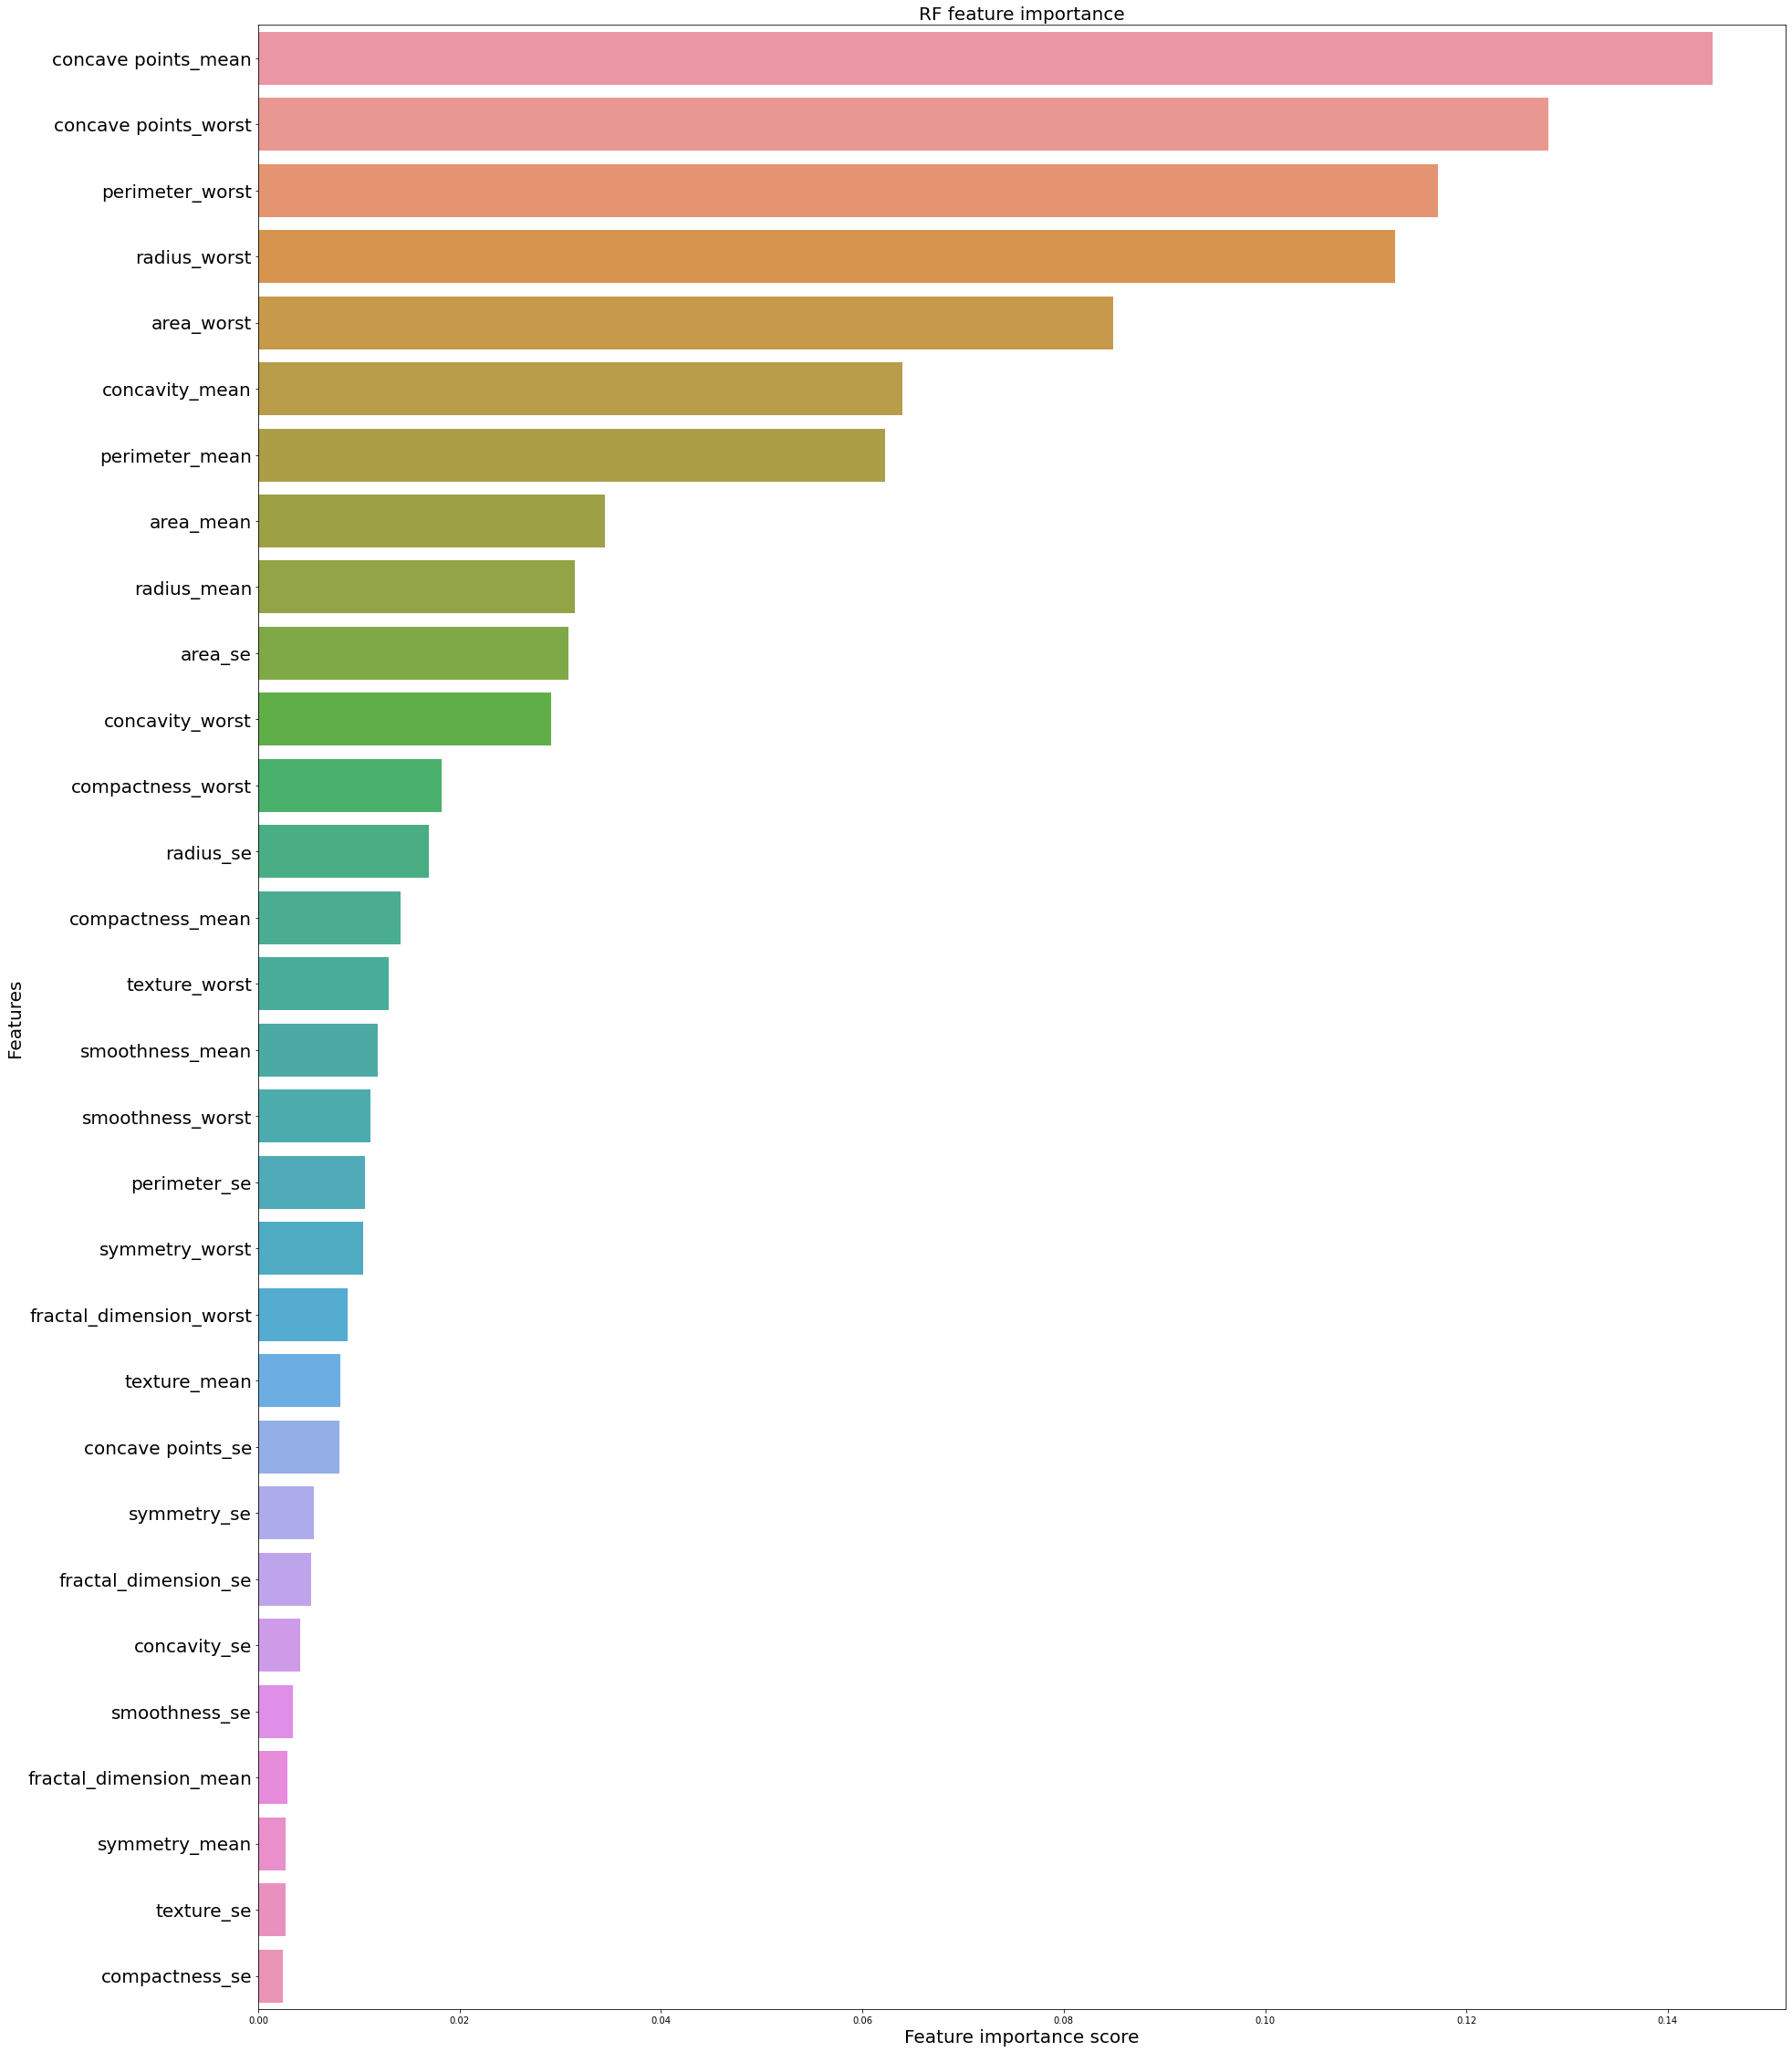

In [28]:
# Plot the rf_opt.feature_importances_ in a barplot 

f, ax = plt.subplots(figsize=(30, 40))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("RF feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

### Bonus - Plotting the boundaries of the optimal Random Forest Classifier 

Based on http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

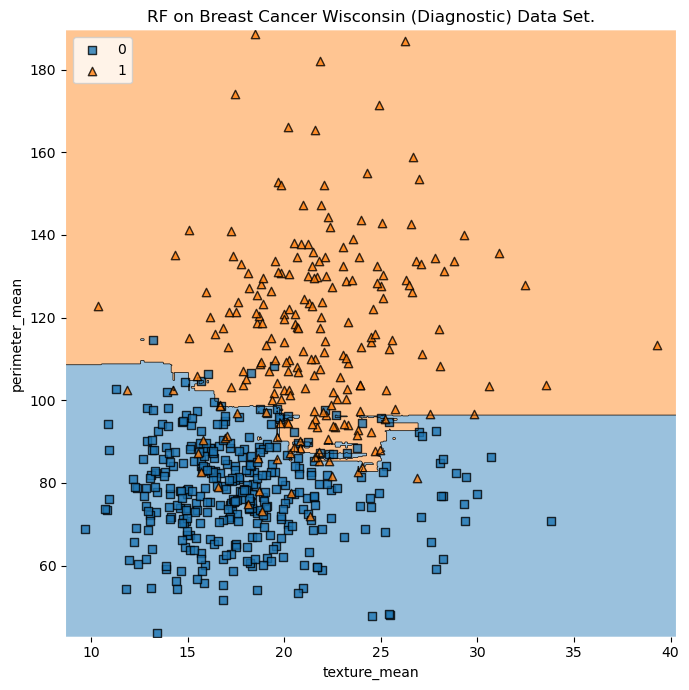

In [26]:
from mlxtend.plotting import plot_decision_regions
 
def plot_rf_boundaries(feature_a, feature_b):
    X_combined = np.vstack((X_train, X_test))[:,(feature_a,feature_b)]
    y_combined = np.hstack((y_train, y_test))

    # Refitting the classifier with 2D data 
    rf_opt.fit(X_combined, y_combined)

    fig, ax = plt.subplots(figsize=(7, 7))
    plot_decision_regions(X_combined, y_combined, clf=rf_opt)
    plt.xlabel(X_train.columns[feature_a])
    plt.ylabel(X_train.columns[feature_b])
    plt.legend(loc='upper left')
    plt.title('RF on Breast Cancer Wisconsin (Diagnostic) Data Set.')
    plt.tight_layout()
    plt.show()
    
# Plot feature 1 vs 2 (or try a combination of different feature numbers)
plot_rf_boundaries(1, 2)